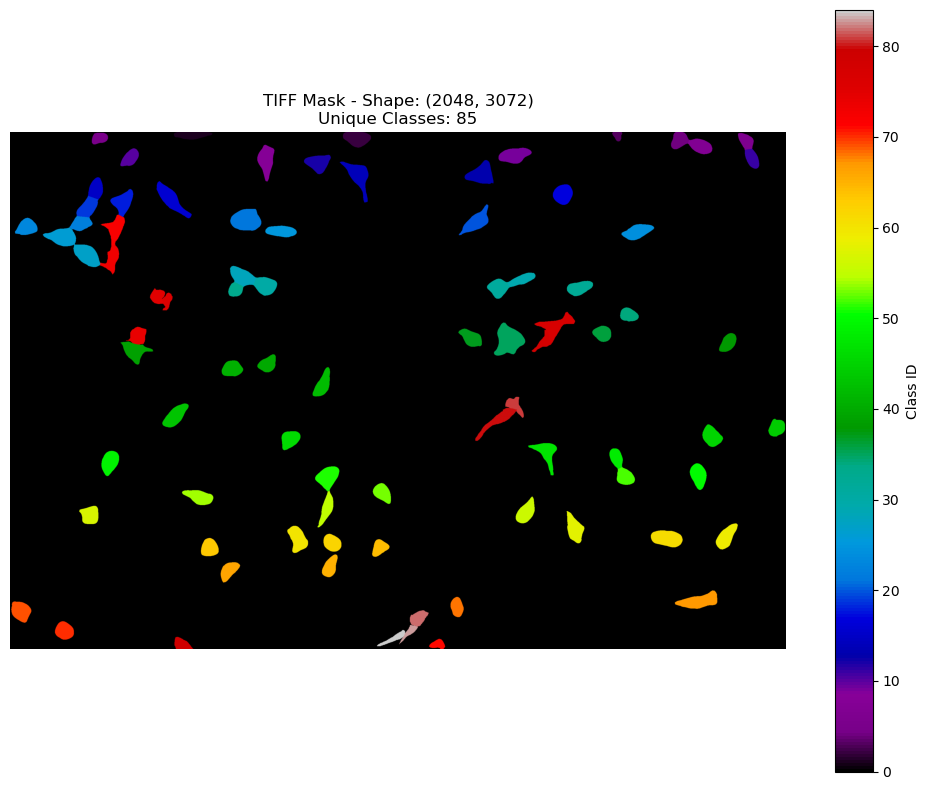

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tifffile

def display_colorful_tiff_mask(tiff_path, title="TIFF Mask"):
    """
    读取并展示TIFF格式的蒙版图像
    
    Parameters:
    tiff_path (str): TIFF文件路径
    title (str): 图像标题
    """
    # 读取TIFF文件
    mask = tifffile.imread(tiff_path)
    
    # 获取唯一值数量，用于生成颜色映射
    unique_values = np.unique(mask)
    num_classes = len(unique_values)

    # 创建图像显示
    plt.figure(figsize=(10, 8))

    # 方法1: 使用预定义的彩色映射
    if num_classes <= 20:
        # 对于类别较少的情况，使用tab20颜色映射
        im = plt.imshow(mask, cmap='tab20')
        cbar = plt.colorbar(im, label='Class ID')
    elif num_classes <= 256:
        # 对于中等数量类别，使用jet或nipy_spectral
        im = plt.imshow(mask, cmap='nipy_spectral')
        cbar = plt.colorbar(im, label='Class ID')
    else:
        # 对于大量类别，使用viridis
        im = plt.imshow(mask, cmap='viridis')
        cbar = plt.colorbar(im, label='Class ID')
    
    plt.title(f'{title} - Shape: {mask.shape}\nUnique Classes: {num_classes}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def display_tiff_mask(tiff_path, title="TIFF Mask"):
    """
    读取并展示TIFF格式的蒙版图像
    
    Parameters:
    tiff_path (str): TIFF文件路径
    title (str): 图像标题
    """
    # 读取TIFF文件
    mask = tifffile.imread(tiff_path)
    
    # 创建图像显示
    plt.figure(figsize=(10, 8))
    plt.imshow(mask, cmap='gray')
    plt.title(f'{title} - Shape: {mask.shape}')
    plt.axis('off')
    plt.colorbar(label='Pixel Value')
    plt.show()
    
    # 打印基本信息
    print(f"蒙版形状: {mask.shape}")
    print(f"数据类型: {mask.dtype}")
    print(f"像素值范围: {mask.min()} - {mask.max()}")

# 使用示例
# display_tiff_mask('your_mask.tif')

def pngtotif(png_path, tif_path):
    """
    将PNG格式的图像转换为TIFF格式
    
    Parameters:
    png_path (str): PNG文件路径
    tif_path (str): TIFF文件保存路径
    """
    # 读取PNG文件
    img = Image.open(png_path)
    
    # 保存为TIFF文件
    img.save(tif_path, format='TIFF')


# 使用示例
png_path = r"C:\somefiles\cellimage\train\2_cp_masks.png"
tif_path = r"C:\somefiles\cellimage\train\2_cp_masks.tif"

# pngtotif(png_path, tif_path)
display_colorful_tiff_mask(tif_path)

In [ ]:
# 只保留有mask下的内容，添加一个alpha通道
output_path = r"C:\somefiles\cellimage\train\2_onlymask_rgba.png"
original_img_path = r"C:\somefiles\cellimage\train\2.jpg"
original_img = Image.open(original_img_path)
original_array = np.array(original_img) # 改为numpy数组
tif_path = r"C:\somefiles\cellimage\train\2_cp_masks.tif"
tif_mask = tifffile.imread(tif_path) # 直接返回的就是numpy数组
alpha_channel = np.where(tif_mask > 0, 255, 0).astype(np.uint8) # 大于0的地方为255，否则为0

# 创建RGBA图像
if len(original_array.shape) == 3:  # 彩色图像
    # 将alpha通道添加到原始图像
    rgba_image = np.dstack([original_array, alpha_channel])
else:  # 灰度图像
    # 将灰度图像扩展为RGB，然后添加alpha通道
    rgb_array = np.stack([original_array, original_array, original_array], axis=2)
    rgba_image = np.dstack([rgb_array, alpha_channel])

# 转换为PIL图像
result_img = Image.fromarray(rgba_image, mode='RGBA')

# 保存图像（如果指定了输出路径）
if output_path:
    result_img.save(output_path, format='PNG')
    print(f"已保存透明图像到: {output_path}")

C:\Users\30648\AppData\Local\Temp\ipykernel_15048\1766625734.py:20: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  result_img = Image.fromarray(rgba_image, mode='RGBA')


已保存透明图像到: C:\somefiles\cellimage\train\2_onlymask_rgba.png


In [3]:
# 只保留有mask下的内容，将其他地方置为白色背景（生成RGB格式）
output_path = r"C:\somefiles\cellimage\train\2_onlymask_rgb.png"
original_img_path = r"C:\somefiles\cellimage\train\2.jpg"
original_img = Image.open(original_img_path)
original_array = np.array(original_img)  # 改为numpy数组
tif_path = r"C:\somefiles\cellimage\train\2_cp_masks.tif"
tif_mask = tifffile.imread(tif_path)  # 直接返回的就是numpy数组

# 创建RGB图像（将mask区域外的像素设置为白色）
if len(original_array.shape) == 3:  # 彩色图像
    # 创建一个白色背景的图像
    rgb_image = np.ones_like(original_array, dtype=np.uint8) * 255
    # 将mask区域内的像素复制到新图像中
    mask_condition = tif_mask > 0
    for i in range(original_array.shape[2]):  # 对每个颜色通道
        rgb_image[:, :, i] = np.where(mask_condition, original_array[:, :, i], rgb_image[:, :, i])
else:  # 灰度图像
    # 创建一个白色背景的图像
    rgb_image = np.ones_like(original_array, dtype=np.uint8) * 255
    # 将mask区域内的像素复制到新图像中
    rgb_image = np.where(tif_mask > 0, original_array, rgb_image)
    
    # 如果需要转换为RGB彩色图像，可以将灰度图像复制到三个通道
    rgb_image = np.stack([rgb_image, rgb_image, rgb_image], axis=2)

# 转换为PIL图像（RGB模式）
result_img = Image.fromarray(rgb_image, mode='RGB')

# 保存图像（如果指定了输出路径）
if output_path:
    result_img.save(output_path, format='PNG')
    print(f"已保存RGB图像到: {output_path}")

已保存RGB图像到: C:\somefiles\cellimage\train\2_onlymask_rgb.png


C:\Users\30648\AppData\Local\Temp\ipykernel_15048\1416105807.py:27: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  result_img = Image.fromarray(rgb_image, mode='RGB')
